# Training and evaluating Singing Voice Detectors

In [1]:
import sys
sys.path.append('../vocaldetection/')
import sklearn
import utils
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns
#import librosa
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
#import medleydb as mdb
%matplotlib inline
import joblib
import scipy.signal

dirname = os.path.dirname('')

I know that the best parameters for training SVM and RF on this dataset are C=0.1 for SVM and nE=100 for RF. [WHY??]

Then, I can just train the models with these parameters and see how the results on confusion changes.

For each set of descriptors, I can do a cross validation evaluation and see the accuracy for each classifier.

Then, I select the greater accuracy to be my reference of ceiling confusion.

In [2]:
features = ['VGGish']

In [3]:
labels = ['absent','present']

In [4]:
# Path for features calculated with Lehner Code
all_feat_path = '/media/DISCO2TB/datasets/MedleyDB/Features/ICASSP2014/'
f = all_feat_path+'ICASSP2014RNN/'
mfcc_path = all_feat_path+'MFCC_29_30_0_0.5_0dt/40_20_40/'

# # Read features and labels
# FEAT_PATH = os.environ["FEAT_PATH"]
# AUDIO_PATH = os.environ["AUDIO_PATH"]
# PIECES = 'split_train_test.json'#os.environ["PIECES_JSON"]
# PIECES_SPLIT =  os.path.join(dirname, 'split_train_test.json')

# Read features and labels
FEAT_PATH = '/media/DISCO2TB/datasets/MedleyDB/Features/'#os.environ["FEAT_PATH"]
AUDIO_PATH = os.environ["AUDIO_PATH"]
PIECES = os.environ["PIECES_JSON"]
PIECES_SPLIT =  os.path.join(dirname, 'split_train_test.json')
SPLITS = 'split_train_test_10.json'

## Recover 10 splits dataset into train and test sets

In [5]:
train_files = []
test_files = []
with open(SPLITS) as json_file:  
    data = json.load(json_file)
#print (data)
    for spl in range(len(data)):
        train_files.append([])
        test_files.append([])
        # Load train data
        for music in data[spl]['train']:
            train_files[spl].append(music)
        #    print (music)

        # Load test data
        #print ('Test data')
        for music in data[spl]['test']:
            test_files[spl].append(music)


## Evaluate on Train Data

In [12]:
# Now lets predict the labels of the train data!
predictions = rf.predict(X)

In [11]:
rf = joblib.load('../best_model_RF_VGGISH_precision.sav')

In [13]:
# Biased Guess Accuracy
ones = np.ones(len(predictions))
accuracy = sklearn.metrics.accuracy_score(y, ones)
print(accuracy)

0.6988659376265695


In [14]:
# RF Accuracy
accuracy = sklearn.metrics.accuracy_score(y, predictions)
print(accuracy)

1.0


In [15]:
from sklearn.metrics import precision_recall_fscore_support

metrics = precision_recall_fscore_support(y, predictions)
print('Negatives : ', metrics[3][0],'- Positives',metrics[3][1])
print('Precision :', round(metrics[0][1],3))
print('Recall    :', round(metrics[1][1],3))
print('F-score   :', round(metrics[2][1],3))

Negatives :  5948 - Positives 13804
Precision : 1.0
Recall    : 1.0
F-score   : 1.0


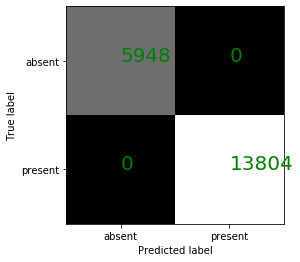

In [18]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(y, predictions)
plot_cm(cm)

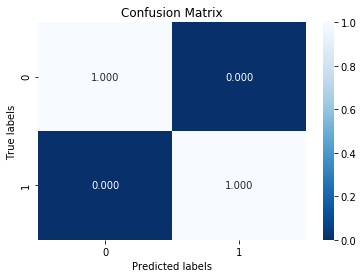

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
ax = sns.heatmap(cm/sum(cm), annot=True, ax = ax, fmt='.3f',vmin=0, vmax=1, cmap="Blues_r"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
#cbar = ax.figure.colorbar(ax.collections[0])
#cbar.set_ticks([0, 1])
#ax.set_ticklabels(["0%", "100%"])

## Evaluate on Test Data

In [20]:
# Now lets predict the labels of the train data!
predictions = rf.predict(X_test)

In [21]:
# Biased Guess Accuracy
ones = np.ones(len(predictions))
accuracy = sklearn.metrics.accuracy_score(y_test, ones)
print(accuracy)

0.7238282346337356


In [22]:
# RF Accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print(accuracy)

0.8349705304518664


In [23]:
from sklearn.metrics import precision_recall_fscore_support

metrics = precision_recall_fscore_support(y_test, predictions)
print('Negatives : ', metrics[3][0],'- Positives',metrics[3][1])
print('Precision :', round(metrics[0][1],3))
print('Recall    :', round(metrics[1][1],3))
print('F-score   :', round(metrics[2][1],3))

Negatives :  984 - Positives 2579
Precision : 0.882
Recall    : 0.892
F-score   : 0.887


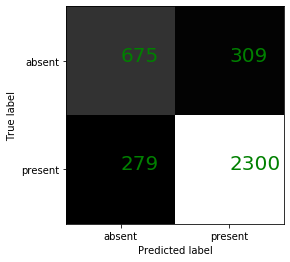

In [24]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(y_test, predictions)
plot_cm(cm)

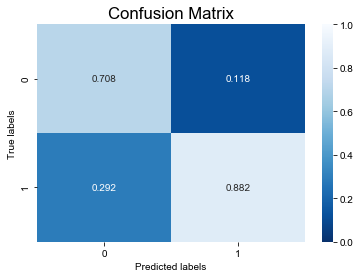

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
ax = sns.heatmap(cm/sum(cm), annot=True, ax = ax, fmt='.3f',vmin=0, vmax=1,  cmap="Blues_r"); #annot=True to annotate cells

sns.set(font_scale=1.4)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
# cbar = cd.figure.colorbar(cd.collections[0])
# cbar.set_ticks([0, 1])
# cbar.set_ticklabels(["0%", "100%"])

In [31]:
cm[1][1]/sum(cm[:,1])

0.7401484402180216

## Evaluate all pieces from test

In [ ]:
df_cm = pd.DataFrame()
df_acc = pd.DataFrame()

In [ ]:
for piece_name in test_files:
    piece_features, piece_labels = sf.read_vggish_features([piece_name])
    #print (piece_test.shape, piece_features.shape)
    pred_labels = rf.predict(piece_features)
    acc = accuracy = sklearn.metrics.accuracy_score(piece_labels, pred_labels)
    cm = sklearn.metrics.confusion_matrix(piece_labels, pred_labels)
    df_cm = df_cm.append({'piece': piece_name,
                          'TP':cm[1][1]/sum(cm[:,1]),
                          'TN':cm[0][0]/sum(cm[:,0]),
                         'error score':'precision'}, ignore_index=True)
    df_acc = df_acc.append({'piece': piece_name,
                            'ACC': acc,
                           'error score':'precision'}, ignore_index=True)

In [85]:
df_acc = df_acc.fillna('f1')


Text(0.5, 0, 'Acurácia')

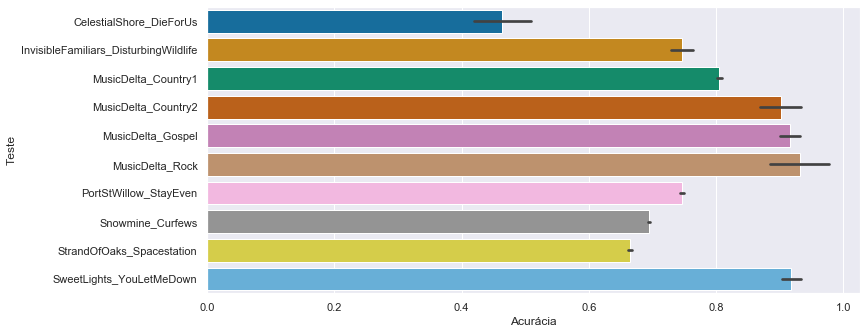

In [92]:
sns.set_palette("colorblind")
sns.barplot(data=df_acc, y='piece',x='ACC')
plt.ylabel("Teste")
plt.xlabel("Acurácia")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 22.960000000000008, 'Porcentagem')

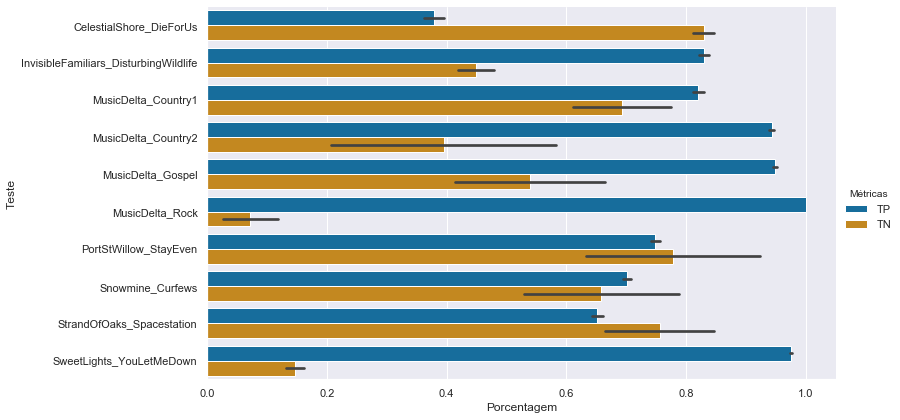

In [93]:
# Show all metrics on one graph
df_cm2 = pd.melt(df_cm, id_vars="piece", var_name="metric", value_name="correct rate", value_vars=['TP', 'TN'])
sns.factorplot(y='piece', x='correct rate', hue='metric', data=df_cm2, kind='bar', size=6, aspect=2)._legend.set_title('Métricas')
plt.ylabel("Teste")
plt.xlabel("Porcentagem")

## Calculate better hiperparameters for VGGish

In [8]:
import separated_features_training as sf
rows_list = []

for spl in range(10):
    
    X_train, y_train = sf.read_vggish_features(train_files[spl])
    grid_search = sf.rf_param_selection(X_train, y_train, 5)
    break

...........................................
> Load data completed!
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

In [10]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluate pieces from all splits


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

import separated_features_training as sf
from tqdm import tqdm_notebook as tqdm

In [17]:
rows_list = []

for spl in range(10):
    
    clf3=RandomForestClassifier(bootstrap=True, 
                                max_depth=None,
                                max_features='sqrt',
                                n_estimators=10)
    
    clf3.fit(X_train, y_train)

    for piece_name in tqdm(test_files[spl]):
        piece_features, piece_labels = sf.read_vggish_features([piece_name], verbose=False)

        proba = clf3.predict_proba(piece_features)
        proba = proba[:,1]

        #
        pred_labels = clf3.predict(piece_features)
        acc = sklearn.metrics.accuracy_score(piece_labels, pred_labels)
        P,R,F1,_ = precision_recall_fscore_support(piece_labels, pred_labels, average='binary')
        rows_list.append({'split':spl,
                          'piece':piece_name,
                          'type':'predict',
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

        #
        pred_filt = scipy.signal.medfilt(pred_labels,kernel_size=3)
        acc = sklearn.metrics.accuracy_score(piece_labels, pred_filt)
        P,R,F1,_ = precision_recall_fscore_support(piece_labels, pred_filt, average='binary')
        rows_list.append({'split':spl,
                          'piece':piece_name,
                          'type':'predict filtered',
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

        #
        thresh = scipy.signal.medfilt(proba,kernel_size=3)
        thresh = np.where(scipy.signal.medfilt(thresh,kernel_size=3) >= 0.5,1,0)
        acc = sklearn.metrics.accuracy_score(piece_labels, thresh)
        P,R,F1,_ = precision_recall_fscore_support(piece_labels, thresh, average='binary')
        rows_list.append({'split':spl,
                          'piece':piece_name,
                          'type':'threshold prob',
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

#         # Plot all together
#         sns.set_style(style='white')
#         plt.figure(figsize=(14,3))
#         plt.plot(piece_labels+2)
#         plt.plot(pred_labels+1)
#         plt.plot(pred_filt)
#         plt.plot(proba-1)
#         plt.plot(scipy.signal.medfilt(proba,kernel_size=3)-2)
#         plt.plot(thresh-3)
#         plt.legend(['Original Label', 'Predicted Label', 'Filter Prediction', 
#                     'Probabilities', 'Filter Probabilities', 'Threshold Prob'], bbox_to_anchor=(1, 1))

In [18]:
results_rf = pd.DataFrame(rows_list)

In [19]:
results_rf = results_rf.sort_values('F1')

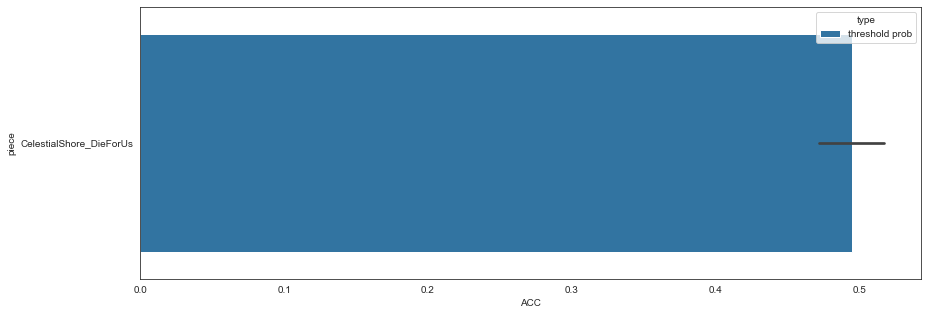

In [21]:
plt.figure(figsize=(14,5))
sns.barplot(y='piece', x='ACC', hue='type', data=results_rf[results_rf['ACC']<0.6])

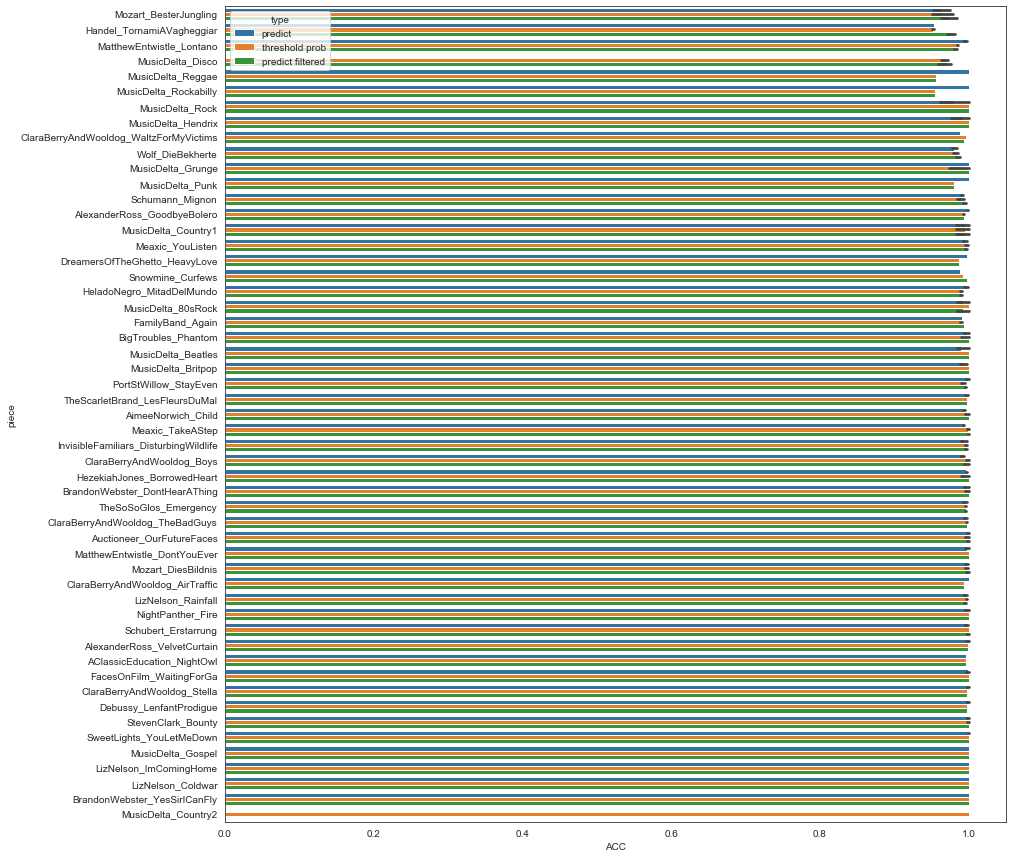

In [23]:
plt.figure(figsize=(14,15))
sns.barplot(y='piece', x='ACC', hue='type', data=results_rf[results_rf['ACC']>0.95])

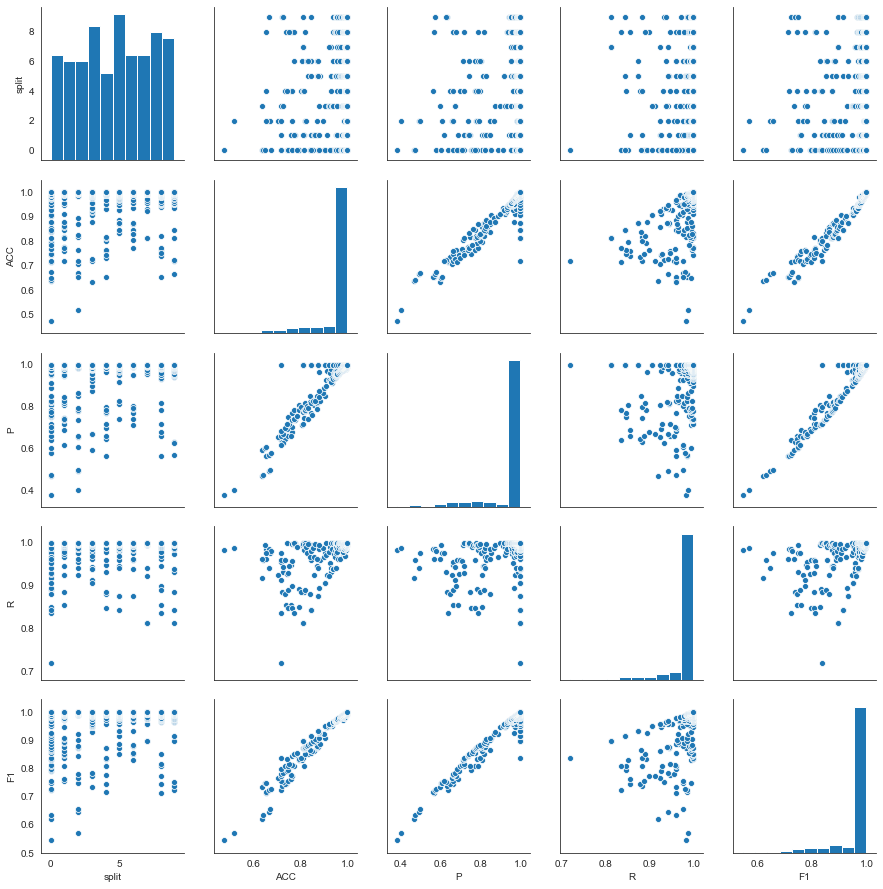

In [22]:
sns.pairplot(data=results_rf)

Text(0.5, 0, 'Relative Importance')

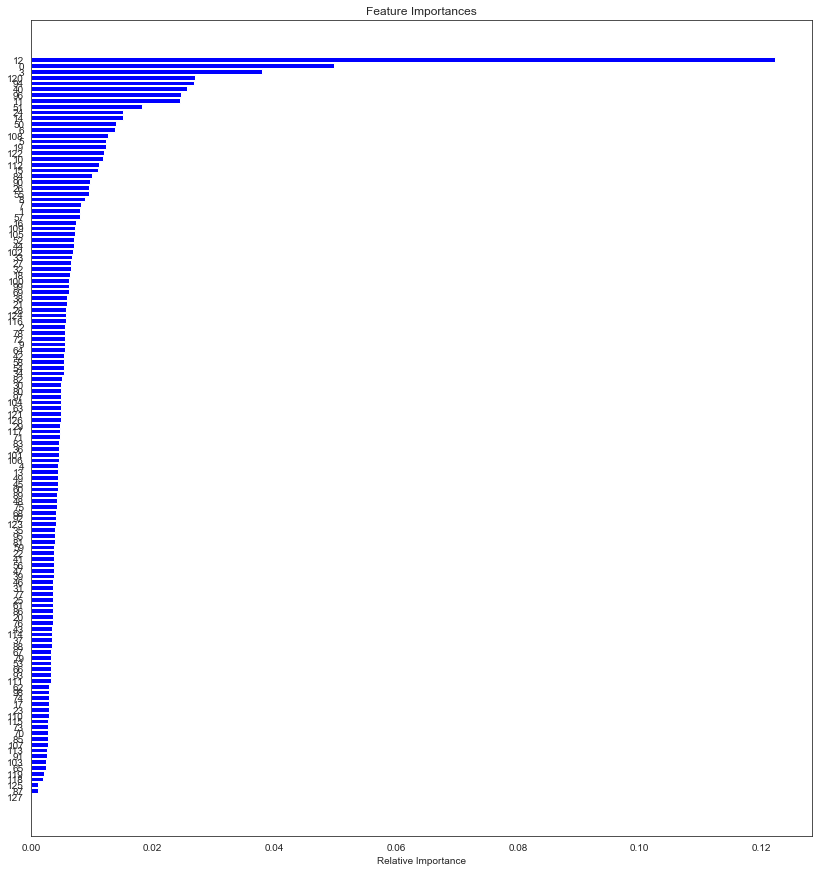

In [43]:
plt.figure(figsize=(14,15))

features = np.arange(128)
importances = clf3.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'Relative Importance')

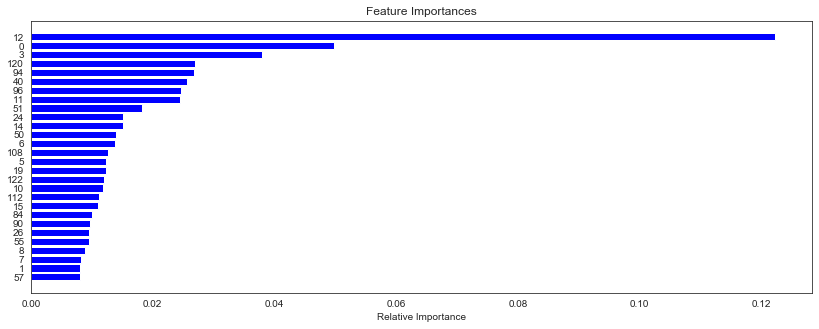

In [45]:
plt.figure(figsize=(14,5))
features = np.arange(128)
importances = clf3.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices))[100:], importances[indices][100:], color='b', align='center')
plt.yticks(range(len(indices))[100:], features[indices][100:])
plt.xlabel('Relative Importance')

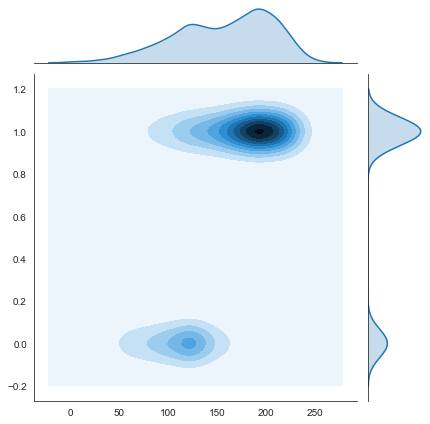

In [64]:
sns.jointplot(X_train[:,12],y_train,kind="kde")

# Testing in one piece

In [151]:
piece_name = 'CelestialShore_DieForUs'

In [152]:
#vggish = pd.read_csv(VGGish_PATH+piece_name+"_VGGish_PCA.csv",index_col=None, header=None)
#vggish = vggish.values
mfcc_piece = mfcc_path+piece_name+'_MIX.arff'
dataset = arff.loadarff(mfcc_piece)
data = pd.DataFrame(dataset[0]).values
#data = np.array(dataset['data'])

In [153]:
piece_features = data

In [154]:
piece_test = np.load(FEAT_PATH+piece_name+"_labels_20ms.npy")
print (piece_test.shape, piece_features.shape)
#piece_test = piece_test[:piece_features.shape[0]]

(13933,) (13933, 60)


In [155]:
piece_features, piece_labels = sf.read_vggish_features([piece_name])

.
> Load data completed!


In [156]:
#pred_labels = rf.predict(piece_features)
pred_labels = eclf3.predict(piece_features)

In [157]:
# RF VGGish Accuracy
accuracy = sklearn.metrics.accuracy_score(piece_labels, pred_labels)
print(accuracy)

0.7838345864661654


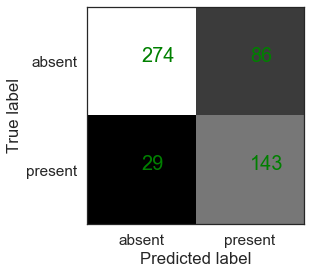

In [158]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(piece_labels, pred_labels)
plot_cm(cm)

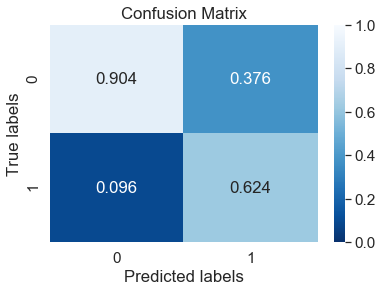

In [159]:
ax= plt.subplot()
ax = sns.heatmap(cm/sum(cm), annot=True, ax = ax, fmt='.3f',vmin=0, vmax=1, cmap="Blues_r"); #annot=True to annotate cells

sns.set(font_scale=1.4)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
# cbar = cd.figure.colorbar(cd.collections[0])
# cbar.set_ticks([])
# cbar.set_ticklabels(["0%", "100%"])
# plt.show()


In [160]:
# import scipy.signal
# import matplotlib.pyplot as plt
# %matplotlib inline

# import seaborn as sns

In [161]:
proba = rf.predict_proba(piece_features)
proba = proba[:,1]

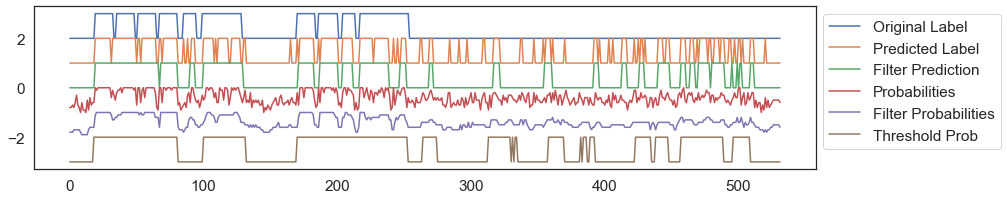

In [162]:
sns.set_style(style='white')
plt.figure(figsize=(14,3))
plt.plot(piece_labels+2)
plt.plot(pred_labels+1)
plt.plot(scipy.signal.medfilt(pred_labels,kernel_size=5))
plt.plot(proba-1)
plt.plot(scipy.signal.medfilt(proba,kernel_size=5)-2)
thresh = np.zeros(len(proba))
thresh[scipy.signal.medfilt(proba,kernel_size=11) >= 0.6] = 1
plt.plot(thresh-3)

plt.legend(['Original Label', 'Predicted Label', 'Filter Prediction', 
            'Probabilities', 'Filter Probabilities', 'Threshold Prob'], bbox_to_anchor=(1, 1))

In [137]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [142]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1, solver='lbfgs')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [143]:
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#y = np.array([1, 1, 1, 2, 2, 2])
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[1 1 1 ... 0 0 0]


In [145]:
# RF VGGish Accuracy
accuracy = sklearn.metrics.accuracy_score(eclf1.predict(X), y)
print(accuracy)
accuracy = sklearn.metrics.accuracy_score(eclf1.predict(X_test), y_test)
print(accuracy)

0.949726609963548
0.8610721302273365


In [146]:
np.array_equal(eclf1.named_estimators_.lr.predict(X),
               eclf1.named_estimators_['lr'].predict(X))

eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft')
eclf2 = eclf2.fit(X, y)
print(eclf2.predict(X))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[1 1 1 ... 0 0 0]


In [148]:
# RF VGGish Accuracy
accuracy = sklearn.metrics.accuracy_score(eclf2.predict(X), y)
print(accuracy)
accuracy = sklearn.metrics.accuracy_score(eclf2.predict(X_test), y_test)
print(accuracy)

0.9367658971243419
0.8599494807746281


In [149]:
eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft', weights=[2,1,1],
       flatten_transform=True)
eclf3 = eclf3.fit(X, y)
print(eclf3.predict(X))

print(eclf3.transform(X).shape)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[1 1 1 ... 0 0 0]
(19752, 6)


In [150]:
# RF VGGish Accuracy
accuracy = sklearn.metrics.accuracy_score(eclf3.predict(X), y)
print(accuracy)
accuracy = sklearn.metrics.accuracy_score(eclf3.predict(X_test), y_test)
print(accuracy)

0.9405123531794248
0.8633174291327533
